<a href="https://colab.research.google.com/github/HaddoucheMilissa/No_linear_regression/blob/main/PythonCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import files

In [9]:
up=files.upload()

Saving heart_rate.txt to heart_rate.txt


   Time (sec)  Heart Rate (BPM)
0         0.0               103
1         5.0               103
2        10.0               103
3        15.0               105
4        20.0               108
        Time (sec)  Heart Rate (BPM)
count   241.000000        241.000000
mean    600.000000        142.983402
std     348.574478         11.387115
min       0.000000        103.000000
25%     300.000000        138.000000
50%     600.000000        147.000000
75%     900.000000        151.000000
max    1200.000000        154.000000


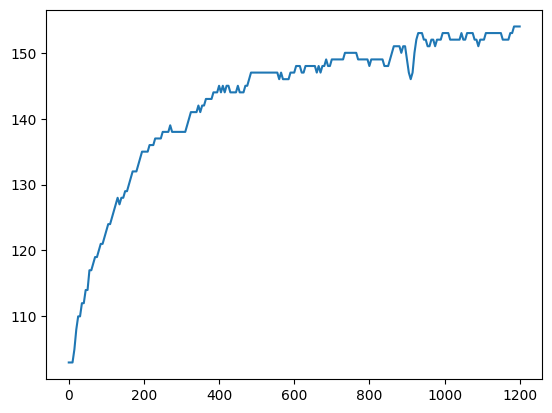

In [10]:
import  pandas as pd
import  matplotlib.pyplot as plt
import numpy as np
hr = pd.read_csv("heart_rate.txt")
print(hr.head())
print(hr.describe())
plt.plot(hr['Time (sec)'], hr['Heart Rate (BPM)'])

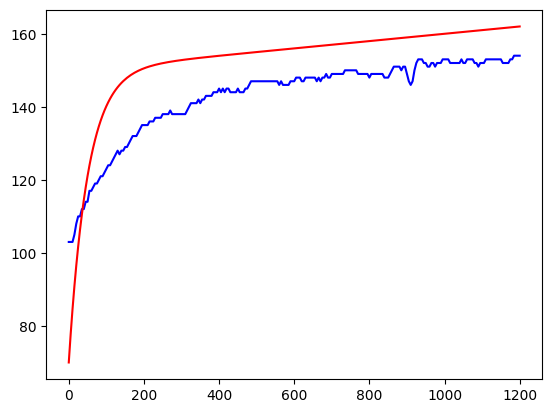

In [15]:
def BPM(t,c0,c1,c2,c3):
  return c0+c1*t-c2*np.exp(-c3*t)
guess=[150,0.01,80,0.02]
len_=len(hr['Time (sec)'])
y1=np.zeros(len_)
for i in range(len_):
  y1[i]=BPM(hr['Time (sec)'][i],guess[0],guess[1],guess[2],guess[3])
plt.plot(hr['Time (sec)'],hr['Heart Rate (BPM)'],'b')
plt.plot(hr['Time (sec)'],y1,'r')




[1.42373197e+02 9.24806121e-03 4.00292044e+01 6.84029133e-03]


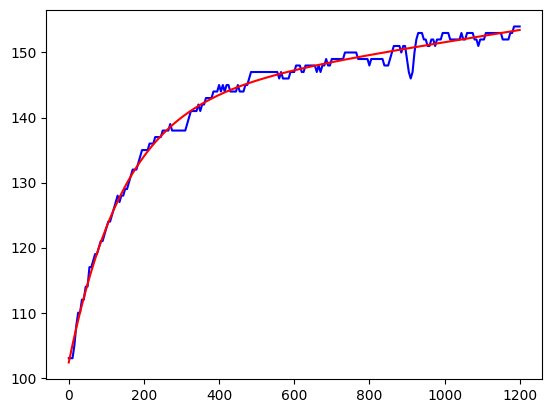

In [18]:
from scipy.optimize import curve_fit
c,cov=curve_fit(BPM,hr['Time (sec)'].values, hr['Heart Rate (BPM)'].values,guess)
print(c)
y2=np.zeros(len_)
for i in range(len_):
  y2[i]=BPM(hr['Time (sec)'][i],c[0],c[1],c[2],c[3])
plt.plot(hr['Time (sec)'],hr['Heart Rate (BPM)'],'b')
plt.plot(hr['Time (sec)'],y2,'r')

In [19]:
from sklearn.metrics import r2_score
print('R2', r2_score(hr['Heart Rate (BPM)'],y2)) #R2= 99,3 perfect predection for BPM

R2 0.9930375847646636
